<a href="https://colab.research.google.com/github/auliafsyafira/Machine_Learning/blob/main/Jobsheet%204/Praktikum5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Praktikum 5**

Klasifikasi Citra Siang dan Malam

## Langkah 0 - Import Library

In [4]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [1]:
# Image directories
train_dir = "/content/drive/MyDrive/machine-learning-2024/images/training"
test_dir = "/content/drive/MyDrive/machine-learning-2024/images/test"

## Langkah 1 - Load Data dan Visualisasikan

In [2]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

In [5]:
# Load training data
train_img = load_dataset(train_dir)

In [6]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 89, 116, 135],
         [ 89, 116, 135],
         [ 89, 116, 135],
         ...,
         [ 83, 100, 116],
         [ 83,  96, 113],
         [124, 137, 154]],
 
        [[ 89, 116, 135],
         [ 89, 116, 135],
         [ 89, 116, 135],
         ...,
         [ 83, 100, 116],
         [ 83,  96, 113],
         [123, 136, 153]],
 
        [[ 89, 116, 135],
         [ 89, 116, 135],
         [ 89, 116, 135],
         ...,
         [ 84, 101, 117],
         [ 83,  96, 113],
         [122, 135, 152]],
 
        ...,
 
        [[163, 145, 107],
         [162, 144, 106],
         [160, 142, 104],
         ...,
         [ 74,  77,  46],
         [ 72,  78,  44],
         [ 67,  73,  39]],
 
        [[172, 154, 116],
         [170, 152, 114],
         [168, 150, 112],
         ...,
         [ 67,  70,  39],
         [ 64,  69,  37],
         [ 60,  66,  32]],
 
        [[199, 181, 143],
         [198, 180, 142],
         [196, 178, 140],
         ...,
         [ 79,  82,  51],
  

In [7]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 71
(469, 640, 3)


In [8]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Shape	: (372, 640, 3)
Label	: day


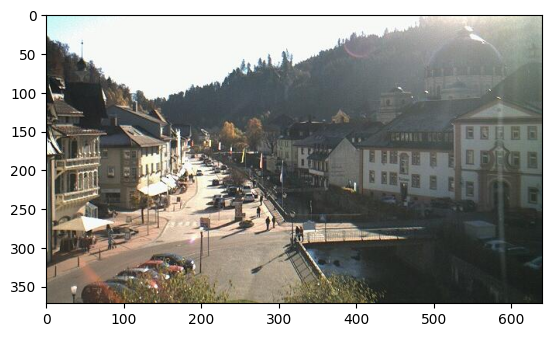

In [9]:
random_img_viz(train_img)

## Langkah 3 - Pra Pengolahan Data

In [10]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

In [11]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

In [12]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

In [13]:
train_std_img_list = preprocess(train_img)

In [14]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 85
(600, 1100, 3)


Shape	: (600, 1100, 3)
Label	: 1


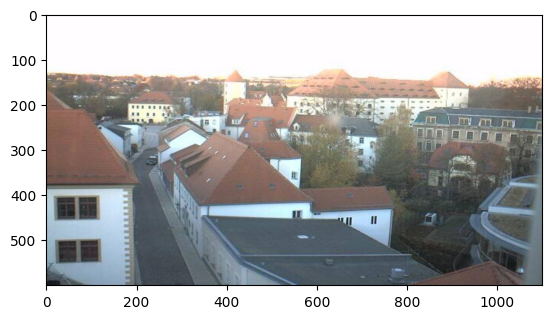

In [16]:
random_img_viz(train_std_img_list)

## Langkah 4 - Ekstraksi Fitur

In [17]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Image 3
Avg Brighness: 108.4199


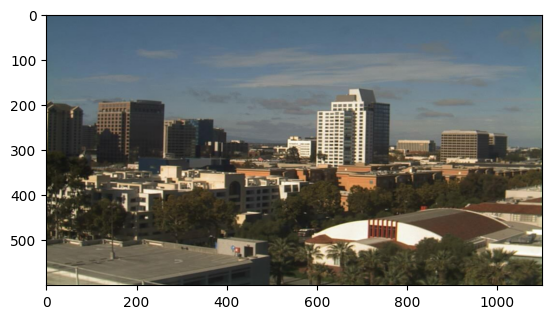

In [18]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Langkah 5 - Klasifikasi dengan Metode Threshold

In [19]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Image 2
Actual label: 1
Predicted label: 1


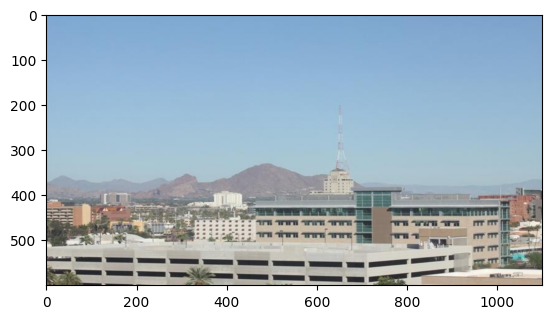

In [20]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Langkah 6 - Evaluasi (Manual)

In [21]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

In [22]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.6989


In [23]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

## Langkah 4 alternatif - Membuat Feature Vectors

In [24]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

In [25]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (93, 2)


,AVG_BRIGHT,LABELS
0,110.252348,1.0
1,187.700786,1.0
2,191.533608,1.0
3,108.419868,1.0
4,196.826403,1.0


In [26]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,105.529983,1.0
1,98.978082,1.0
2,110.871711,1.0
3,110.614936,1.0
4,107.579145,1.0


## Langkah 5 alternatif

In [29]:
print(y_train.value_counts())

LABELS
1.0    93
Name: count, dtype: int64


In [28]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)


## MASIH ERROR ANJAY (ERROR: HANYA ADA 1 KELAS HARUSNYA LEBIH)

ValueError: The number of classes has to be greater than one; got 1 class